In [1]:
import cv2 as cv
import numpy as np  
import matplotlib.pyplot as plt
import math

In [2]:
img = cv.imread('lena.jpg')
grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
h = grayImg.shape[0]
w = grayImg.shape[1]

In [3]:
img_fft = np.fft.fft2(grayImg)
img_fftshift = np.fft.fftshift(img_fft)
fudupu = np.log(np.abs(img_fftshift))

### **傅里叶变换的意义**
- **简化计算**，即傅里叶变换可将空间域中复杂的卷积运算转化为频率域中简单的乘积运算。
- 对于某些在空间域中难于处理或处理起来比较复杂的问题，利用傅里叶变换把用**空间域** 表示的图像映射到**频率域**，再利用 **频域滤波** 或 **频域分析** 方法对其进行处理和分析，然后再把其在频域中处理和分析的结果变换回 **空间域** ，从而可达到 **简化处理和分析** 的目的。
- 某些只能在频率域处理的 **特定应用需求** ，比如：
  - 图像特征提取
  - 数据压缩
  - 纹理分析
  - 水印嵌入

#### 相位谱为0，幅度谱

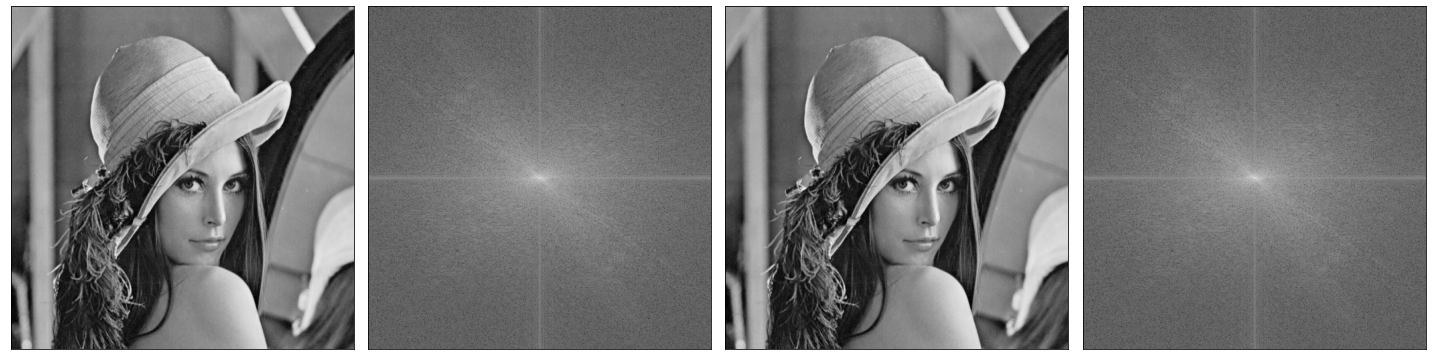

(None, None)

In [4]:
rebulid = np.real( np.fft.ifft2(np.abs(img_fft)*np.exp(1j*(np.angle(img_fft)))) )
rebuild_fft = np.fft.fft2(rebulid)
rebuild_fftshift = np.fft.fftshift(rebuild_fft)
rebulid_fudupu = np.log(np.abs(rebuild_fftshift))

#显示
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(grayImg, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(fudupu, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(rebulid, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(rebulid_fudupu, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout(), plt.show()

#### 幅度谱为1，相位谱

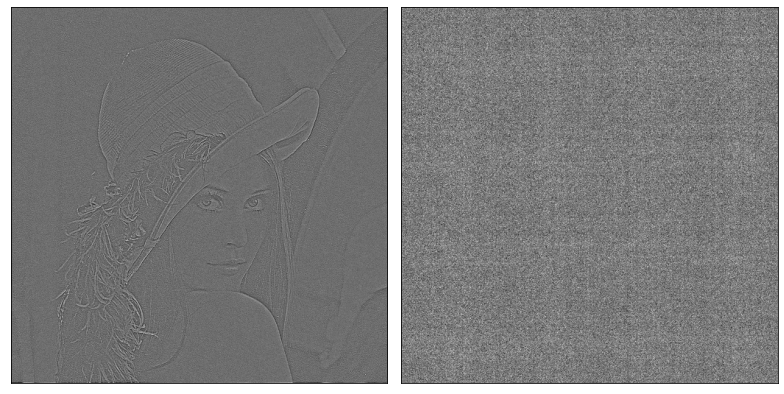

In [5]:
p = np.real(np.fft.ifft2(np.exp(1j*np.angle(img_fft))))
p_fft = np.fft.fft2(p)
p_fftshift = np.fft.fftshift(p_fft)
p_fudupu = np.log(np.abs(p_fftshift))

plt.figure(figsize=(11, 11))
plt.subplot(121), plt.imshow(p, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(p_fudupu, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()